# Линейная регрессия

# Задание 1

Считайте файл weights_heights.csv

In [1]:
import pandas as pd

df = pd.read_csv("weights_heights.csv")

Выведите первые 10 строк датафрейма. Выведите размер датафрейма

In [2]:
df.head()

,Height,Weight
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


### Разобьем данные на тренировочную и тестовую выборки

In [3]:
from sklearn.model_selection import train_test_split

X = df[['Height']] # матрица объект-признак. Обычно признаков > 1
y = df['Weight'] # вектор целевой переменной

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

In [4]:
X.shape

(25000, 1)

# Проверим, как работает функция линейной регрессии из sklearn

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()

model.fit(Xtrain, ytrain) # обучение модели

coef = float(model.coef_) # веса при признаках
intercept = model.intercept_ # свободный коэффициент (w0)
print(f'''
Вес при признаке "рост": {coef:.3f},
Свободный коэффициент:  {intercept:.3f}''')


Вес при признаке "рост": 3.051,
Свободный коэффициент:  -80.413


$ Weight = w_0 + w_1\cdot Height$

$ Weight = -81.4 + 3\cdot Height$

Возьмите любую пару рост и вес из датафрейма. Проверьте, что если подставить их в нашу формулу, получится что-то похожее

In [6]:
h = df['Height'][0]
w = df['Weight'][0]

In [8]:
w

112.9925

In [9]:
intercept + h * coef

120.262973477454

In [10]:
pred_test = model.predict(Xtest) # делаем предсказание

mean_squared_error(pred_test, ytest) ** 0.5 # ошибка примерно 10 фунтов

10.142596191178072

In [11]:
pred_train = model.predict(Xtrain)

mean_squared_error(pred_train, ytrain) ** 0.5

10.063776144182873

Модель не переобучена. Как мы это поняли?

### Это тот редкий случай, когда мы можем изобразить график с линейной регрессией.

In [ ]:
from matplotlib import pylab as plt
%pylab inline

scatter(df['Height'], df['Weight'])

plot(X, coef * X + intercept, 'r')

# Задание 2

Поработаем с датасетом Бостон.

In [13]:
from sklearn.datasets import load_boston

data = load_boston()
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/home/al/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing datas

In [14]:
X_full = data.data
y_full = data.target

Разбейте данные на train и test. Обучите линейную регрессию на train и сделайте предсказание на train и test.

In [16]:
# your code here
Xtrain, Xtest, ytrain, ytest = train_test_split(X_full, y_full, test_size=0.2)

model = LinearRegression()
model.fit(Xtrain, ytrain) # обучение модели
pred_train = model.predict(Xtrain)
pred_test = model.predict(Xtest)

Выведите MSE на train и на test. Выведите RMSE. На сколько в среднем мы ошибаемся на train и test? Модель переобучена, недообучена или все ок?

In [17]:
mean_squared_error(pred_test, ytest) ** 0.5 

4.726838053480351

In [18]:
mean_squared_error(pred_train, ytrain) ** 0.5

4.695754032786772

Нарисуем матрицу корреляций признаков.

<AxesSubplot:>

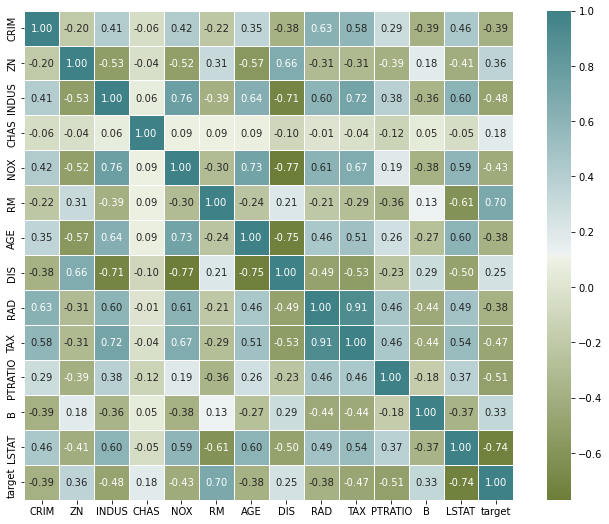

In [20]:
import seaborn as sns

data1 = pd.DataFrame(data=np.c_[data['data'], data['target']],
                     columns=list(data['feature_names']) + ['target'])

plt.figure(figsize=(12,9))

corr = data1.corr()

sns.heatmap(corr,annot=True,linewidths=.5,fmt= '.2f',\
            mask=np.zeros_like(corr, dtype=bool), \
            cmap=sns.diverging_palette(100,200,as_cmap=True), square=True)

In [21]:
data1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Мы можем удалять признаки

In [22]:
del data1['RAD']

Создавать новые из уже существующих

In [23]:
data1['NEW'] = data1['LSTAT'] ** 2

Посмотрим на новую матрицу объект-признак

In [24]:
y = data1['target']

X = data1.drop('target', axis=1)

X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,NEW
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98,24.8004
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,83.5396
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,16.2409
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94,8.6436
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33,28.4089


In [26]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)
model = LinearRegression()
model.fit(Xtrain, ytrain) # обучение модели
pred_train = model.predict(Xtrain)
pred_test = model.predict(Xtest)
print(mean_squared_error(pred_test, ytest) ** 0.5, mean_squared_error(pred_train, ytrain) ** 0.5)

5.351735507025865 4.033859964311233


/home/al/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
  warnings.warn(
/home/al/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
  warnings.warn(
/home/al/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
  warnings.warn(


Можем изучить каждый признак в отдельности, изучить его распределение с ЦП

In [ ]:
for c in data1.columns:
    if c != 'target':
        print(c)
        scatter(data1[c], data1['target'])
        show()

Попробуйте убрать из данных признаки с наименьшей корреляцией с target (1, 2 или 3 признака) и обучить линейную регрессию на оставшихся признаках. Как изменилось качество?

In [ ]:
#your code here

# Задание 3. 

Откроем новый датасет: в нем собрана информация про мобильные телефоны, их характеристики и ценовой диапазон. Посмотрите, какие там есть колонки, прикиньте, что они могут означать. Проверьте, есть ли в этом датасете пропущенные значения. 

In [ ]:
# your code here

Бонус: давайте на графике посмотрим, как взаимодействуют друг с другом телефонные параметры. Попробуйте проанализировать график и понять, что на нем изображено. 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 12))

corr = data.corr()
sns.heatmap(corr, 
            annot=True, linewidths=.5, fmt='.2f',
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap=sns.diverging_palette(100, 200, as_cmap=True), square=True)
plt.show()

Задача: поработайте с признаками и обучите линейную регрессию для предсказания цены телефона.

In [ ]:
# your code here